# Gráficas de la evolución del core number de los AS en función del tiempo

In [5]:
import pandas as pd
import random
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import subprocess
import os
def core_number1(file, auS):
    output=0
    with open (file, "r") as myfile:
        for line in myfile:
            if "Starting" in line:
                break
            else:
                if(int(line.split(" ")[1]) == int(auS)):
                    output=int(line.split(" ")[0])
                    break
    myfile.close()
    return output

def top_core1(file):
    output=0
    with open (file, "r") as myfile:
        for line in myfile:
            if "Starting" in line:
                break
            else:
                if(int(line.split(" ")[0]) > output):
                    output=int(line.split(" ")[0])
    myfile.close()
    return output

def core_number2(file,auS):
    G=nx.read_adjlist(file)
    try: 
        output=nx.core_number(G)[str(auS)]
    except KeyError:
        output=0
    return output

def top_core2(file):
    G=nx.read_adjlist(file)
    output=max(nx.core_number(G).values())
    return output


top_core=top_core1
core_number=core_number1
# Defino los AS que quiero graficar
#AS=[["Apple",714], ["Google","15169"],["Facebook","32934"], ["Netflix","2906"], ["Akamai","20940"], ["Microsoft","8075"],["Amazon","16509"]]
AS=[["AS"+str(i),i] for i in range(0,83761)]
time=np.array([])
core=list()
#core_norm=list()
files=sorted(listdir("./LaNet_logs_kcores/"))
cant_files=len(files)
core=np.zeros([cant_files, 83761])
idx=0
for file in sorted(listdir("./LaNet_logs_kcores/")):
    print("Procesando el archivo:"+ file)
    time=np.append(time,int(file.split(".")[0]))
    #core.append([core_number("./LaNet_logs/"+file+"/cores.log",x[1]) for x in AS] + [top_core("./LaNet_logs/"+file+"/cores.log")])
    core[idx,0]=top_core("./LaNet_logs_kcores/"+file+"/cores.log")
    with open ("./LaNet_logs_kdense/"+file+"/cores.log", "r") as myfile:
        for line in myfile:
            if "Starting" in line:
                break
            else:
                ASN=int(line.split(" ")[1])
                coreN=int(line.split(" ")[0])
                #print(ASN)
                #print(coreN)
                core[idx,ASN]=coreN
    myfile.close()
    print(core[idx])
    idx+=1

Procesando el archivo:19980100
[ 10.   9.   0. ...,   0.   0.   0.]
Procesando el archivo:19980200
[ 10.   9.   3. ...,   0.   0.   0.]
Procesando el archivo:19980300
[ 11.   9.   3. ...,   0.   0.   0.]
Procesando el archivo:19980400
[ 11.  10.   3. ...,   0.   0.   0.]
Procesando el archivo:19980500
[ 11.   9.   2. ...,   0.   0.   0.]
Procesando el archivo:19980600
[ 11.  10.   0. ...,   0.   0.   0.]
Procesando el archivo:19980700
[ 11.   9.   2. ...,   0.   0.   0.]
Procesando el archivo:19980800
[ 11.   9.   2. ...,   0.   0.   0.]
Procesando el archivo:19980900
[ 12.  11.   2. ...,   0.   0.   0.]
Procesando el archivo:19981000
[ 13.  12.   0. ...,   0.   0.   0.]
Procesando el archivo:19981100
[ 11.  10.   0. ...,   0.   0.   0.]
Procesando el archivo:19981200
[ 11.  10.   0. ...,   0.   0.   0.]
Procesando el archivo:19990200
[ 12.  11.   0. ...,   0.   0.   0.]
Procesando el archivo:19990300
[ 12.  11.   0. ...,   0.   0.   0.]
Procesando el archivo:19990400
[ 13.  11.   0. .

[ 52.   0.   2. ...,   0.   0.   0.]
Procesando el archivo:20080800
[ 51.   0.   2. ...,   0.   0.   0.]
Procesando el archivo:20080900
[ 54.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20081000
[ 53.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20081100
[ 52.   0.   2. ...,   0.   0.   0.]
Procesando el archivo:20081200
[ 50.   0.   2. ...,   0.   0.   0.]
Procesando el archivo:20090100
[ 52.   0.   2. ...,   0.   0.   0.]
Procesando el archivo:20090200
[ 53.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20090300
[ 54.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20090400
[ 47.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20090500
[ 50.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20090600
[ 51.   2.   2. ...,   0.   0.   0.]
Procesando el archivo:20090700
[ 52.   0.   2. ...,   0.   0.   0.]
Procesando el archivo:20090800
[ 54.   3.   2. ...,   0.   0.   0.]
Procesando el archivo:20090900
[ 54.   0.   2. ...,   0.   0.   0.]
Procesando 

In [6]:
df=pd.DataFrame(core.tolist(), columns= ["top_dense"] + [i for i in range(1,83761)])
df["time"]=np.floor(time/10000)*100+(time-np.floor(time/10000)*10000)/12
df.to_csv("kcores.csv")

In [ ]:
df=pd.read_csv("kdense.csv",index_col=0)
df.head()

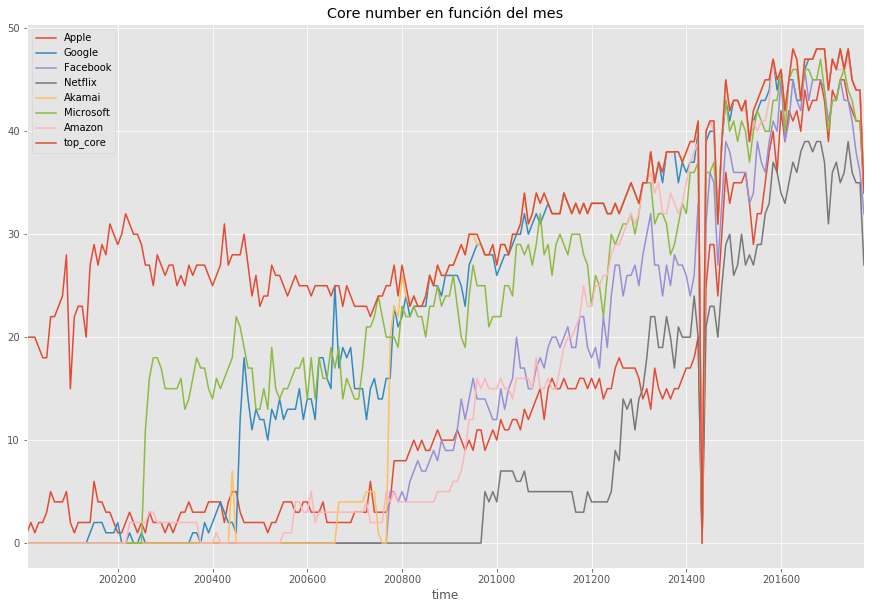

In [15]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
matplotlib.style.use('ggplot')
plt.figure()
df.plot(figsize=(15,10), x="time")
plt.title("Core number en función del mes")
plt.savefig("./graficas_core/core.pdf")
plt.show()


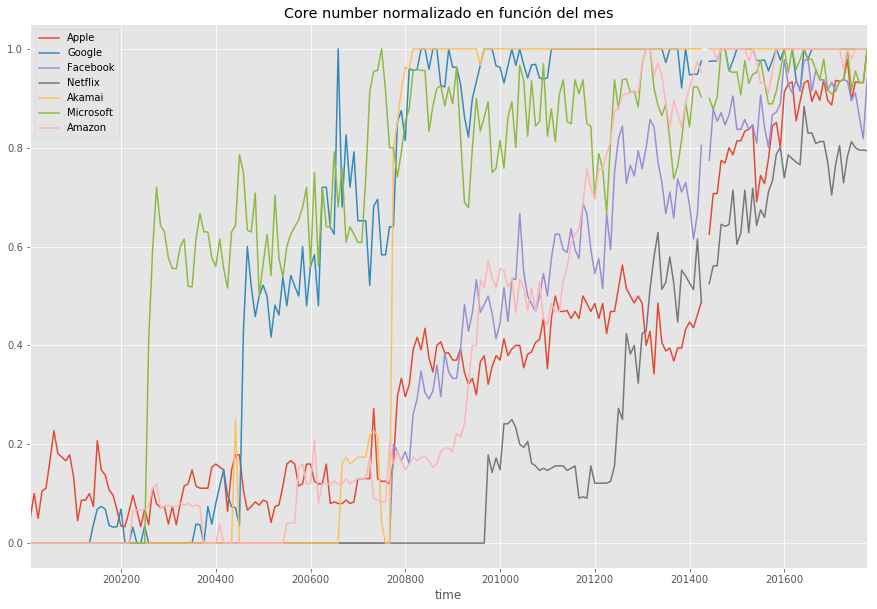

In [16]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
df2=df.copy()
for col in df2.columns:
    df2[col]=df2[col]/df2["top_core"]
matplotlib.style.use('ggplot')
plt.figure()
df2.drop("top_core",1).plot(figsize=(15,10), x="time")
plt.title("Core number normalizado en función del mes")
plt.savefig("./graficas_core/core-norm.pdf")
plt.show()


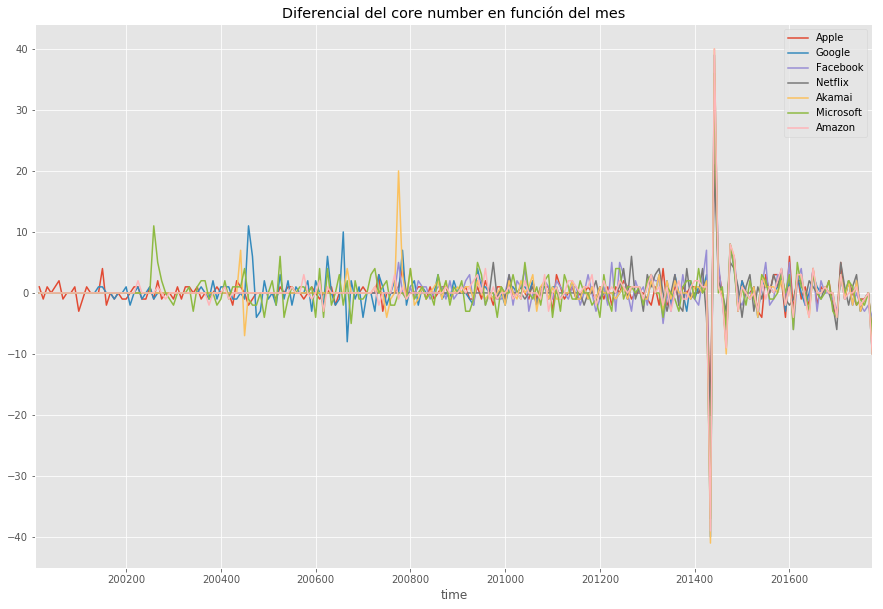

In [17]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
df2=df.copy()
df2=df2.diff()
df2["time"]=df["time"]
matplotlib.style.use('ggplot')
plt.figure()
df2.drop("top_core",1).plot(figsize=(15,10), x="time")
plt.title("Diferencial del core number en función del mes")
plt.savefig("./graficas_core/core-diff.pdf")
plt.show()

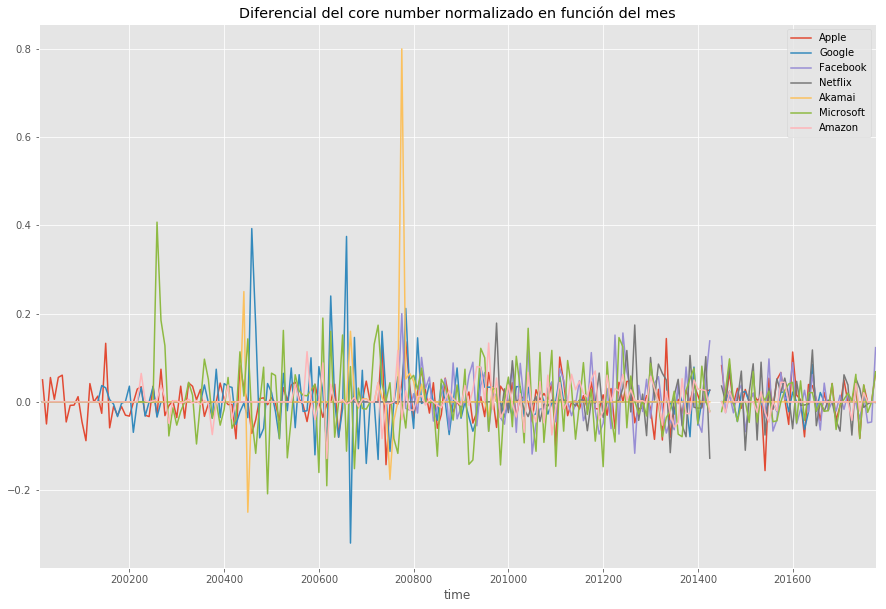

In [18]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
df2=df.copy()
for col in df2.columns:
    df2[col]=df2[col]/df2["top_core"]
df2=df2.diff()
df2["time"]=df["time"]
matplotlib.style.use('ggplot')
plt.figure()
df2.drop("top_core",1).plot(figsize=(15,10), x="time")
plt.title("Diferencial del core number normalizado en función del mes")
plt.savefig("./graficas_core/core-diff-norm.pdf")
plt.show()

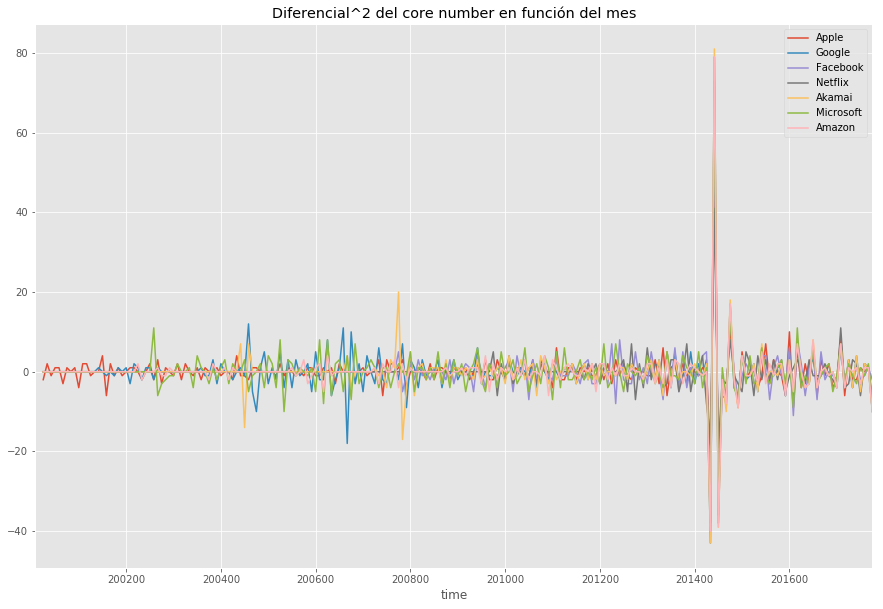

In [19]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
df2=df.copy()
df2=df2.diff().diff()
df2["time"]=df["time"]
matplotlib.style.use('ggplot')
plt.figure()
df2.drop("top_core",1).plot(figsize=(15,10), x="time")
plt.title("Diferencial^2 del core number en función del mes")
plt.savefig("./graficas_core/core-diff-diff.pdf")
plt.show()

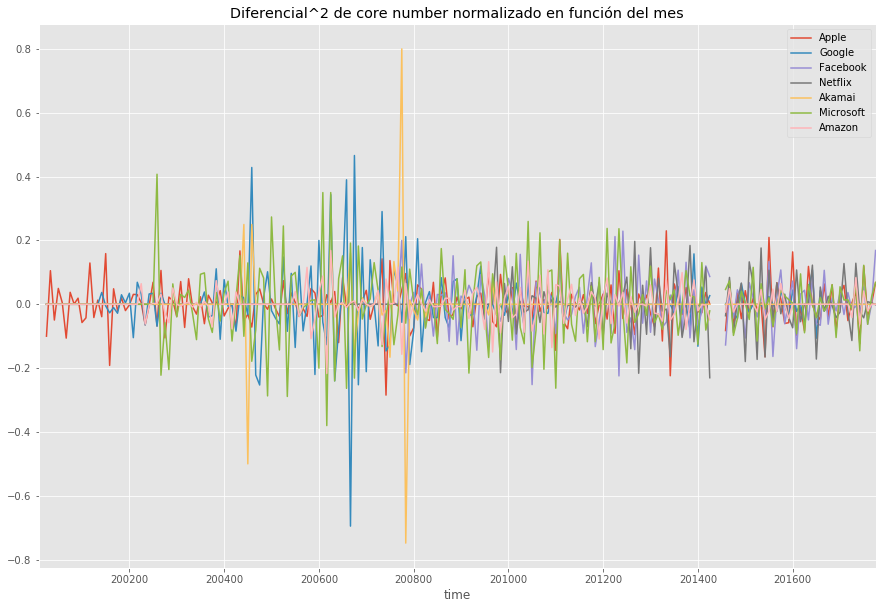

In [20]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.mlab import csv2rec
from matplotlib.cbook import get_sample_data
df2=df.copy()
for col in df2.columns:
    df2[col]=df2[col]/df2["top_core"]
df2=df2.diff().diff()
df2["time"]=df["time"]
matplotlib.style.use('ggplot')
plt.figure()
df2.drop("top_core",1).plot(figsize=(15,10), x="time")
plt.title("Diferencial^2 de core number normalizado en función del mes")
plt.savefig("./graficas_core/core-diff-diff-norm.pdf")
plt.show()

In [33]:
core[:,15169]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   1.,   2.,   3.,   1.,   2.,
         1.,   2.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
         0.,   2.,   1.,   2.,   3.,   4.,   3.,   2.,   2.,   1.,  13.,
        17.,  14.,  11.,  14.,  12.,  11.,  10.,  13.,  13.,  13.,  12.,
        13.,  13.,  13.,  15.,  12.,  14.,  14.,  13.,  18.,  18.,  16.,
        15.,  25.,  17.,  19.,  19.,  19.,  15.,  15.,  16.,  12.,  14.,
        16.,  14.,  14.,  16.,  16.,  23.,  20.,  22.,  24.,  22.,  23.,
        22.,  23.,  24.,  26.,  25.,  25.,  24.,  26.,  26.,  26.,  26.,
        26.,  24.,  27.,  28.,  29.,  29.,  28.,  28.,  28.,  26.,  28.,
        28.,  26.,  28.,  30.,  31.,  32.,  30.,  31.,  32.,  32.,  32.,
        33.,  32.,  32.,  32.,  34.,  33.,  32.,  33.,  32.,  33.,  32.,
        33.,  33.,  33.,  33.,  32.,  32.,  32.,  3